<div style="text-align:right">Update date: Feb 20, 2024</div><br>

# Modeling for classification<br>
## Objetive<br>
Select the best hyperparameters for the Logistic Regression classification model that allows classifying potential customers (leads) based on their probability of becoming real customers.<br><br>
## The general outline of this notebook is as follows:<br><br>

1. Imports and adjustments
2. Load data
3. Modeling
4. Evaluate model
7. Model reporting
8. Conclusions and next step<br><br>



 Main work tools<br>

|Package|                           Version|
|:---------------------------------|--------:|
|matplotlib                        | 3.8.0|
|numpy                             | 1.26.3|
|notebook                          |6.5.4|
|pandas                            | 2.1.4|
|python                            |3.11.7|
|seaborn                           | 0.13.0|
|sklearn                           |1.2.2|
|skplt                             |0.3.7|

## Imports and adjustments

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

#Turn off scientific notation
pd.options.display.float_format = '{:.2f}'.format
%config IPCompleter.greedy=True

#Disable warnings
import warnings
warnings.filterwarnings("ignore")

## Load data

Names of the data files

In [17]:
filename_x = 'x_selected_vars.pickle'
filename_y = 'y_selected_var.pickle'

Load predictors variables and the target

In [18]:
x = pd.read_pickle('data/' + filename_x)
y = pd.read_pickle('data/' + filename_y)

## Modeling

### Reserve the validation dataset

In [19]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.3)

### Generate the pipe and the dictionary of algorithms, parameters and values to be tested

In [20]:
pipe = Pipeline([('algorithm', RandomForestClassifier())])

grid = [{'algorithm': [LogisticRegression()],
         'algorithm__n_jobs': [-1],
         'algorithm__solver': ['saga'],
         'algorithm__penalty': ['elasticnet', 'l1', 'l2', 'None'],
         'algorithm__C': [0, 0.25, 0.5, 0.75, 1]},
       ]

### Optimize hyper parameters

In [21]:
grid_search = GridSearchCV(estimator=pipe,
                           param_grid=grid,
                           cv=3,
                           scoring='roc_auc',
                           verbose=0,
                           n_jobs=-1)

model = grid_search.fit(train_x, train_y)


pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_algorithm__C,param_algorithm__n_jobs,param_algorithm__penalty,param_algorithm__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
17,0.04,0.00,0.00,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",1,-1,l1,saga,"{'algorithm': LogisticRegression(C=1, n_jobs=-...",0.88,0.87,0.89,0.88,0.01,1
13,0.04,0.00,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.75,-1,l1,saga,"{'algorithm': LogisticRegression(C=1, n_jobs=-...",0.88,0.87,0.89,0.88,0.01,2
9,0.04,0.00,0.00,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.50,-1,l1,saga,"{'algorithm': LogisticRegression(C=1, n_jobs=-...",0.88,0.87,0.89,0.88,0.01,3
5,0.05,0.00,0.02,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.25,-1,l1,saga,"{'algorithm': LogisticRegression(C=1, n_jobs=-...",0.88,0.87,0.89,0.88,0.01,4
18,0.03,0.00,0.00,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",1,-1,l2,saga,"{'algorithm': LogisticRegression(C=1, n_jobs=-...",0.88,0.86,0.89,0.88,0.01,5
14,0.03,0.01,0.00,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.75,-1,l2,saga,"{'algorithm': LogisticRegression(C=1, n_jobs=-...",0.88,0.86,0.88,0.88,0.01,6
10,0.03,0.00,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.50,-1,l2,saga,"{'algorithm': LogisticRegression(C=1, n_jobs=-...",0.88,0.86,0.88,0.87,0.01,7
6,0.03,0.00,0.02,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.25,-1,l2,saga,"{'algorithm': LogisticRegression(C=1, n_jobs=-...",0.88,0.86,0.88,0.87,0.01,8
16,0.01,0.00,0.00,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",1,-1,elasticnet,saga,"{'algorithm': LogisticRegression(C=1, n_jobs=-...",NaN,NaN,NaN,NaN,NaN,9
15,0.00,0.00,0.00,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.75,-1,None,saga,"{'algorithm': LogisticRegression(C=1, n_jobs=-...",NaN,NaN,NaN,NaN,NaN,9


## Evaluate model

### Predict upon validation

In [23]:
pred = model.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluate on validation

In [24]:
roc_auc_score(val_y, pred)

0.8602177198684197

### Browse the best model

In [26]:
model.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('algorithm',
                 LogisticRegression(C=1, n_jobs=-1, penalty='l1',
                                    solver='saga'))])>

In [28]:
model.best_estimator_.named_steps.algorithm

LogisticRegression(C=1, n_jobs=-1, penalty='l1', solver='saga')

In [29]:
pd.DataFrame(
    data=model.best_estimator_.named_steps.algorithm.coef_,
    columns=model.best_estimator_.named_steps.algorithm.feature_names_in_
).unstack().sort_values(ascending=False)

score_actividad_mms                    0    8.57
tiempo_en_site_total_mms               0    4.57
origen_Lead Add Form                   0    2.81
ocupacion_Working Professional         0    2.24
ult_actividad_SMS Sent                 0    1.13
score_perfil_mms                       0    1.13
descarga_lm_No                         0    0.38
ambito_Marketing Management            0    0.18
fuente_Organic Search                  0    0.17
ambito_OTROS                           0    0.02
visitas_total_mms                      0    0.00
ambito_Select                          0   -0.43
ocupacion_Unemployed                   0   -0.64
ult_actividad_Page Visited on Website  0   -0.66
ult_actividad_Chat Conversation        0   -1.07
ult_actividad_Converted to Lead        0   -1.41
dtype: float64

## MODEL REPORTING

### Gain Chart

In [32]:
lr_sco = model.best_estimator_.predict_proba(val_x)

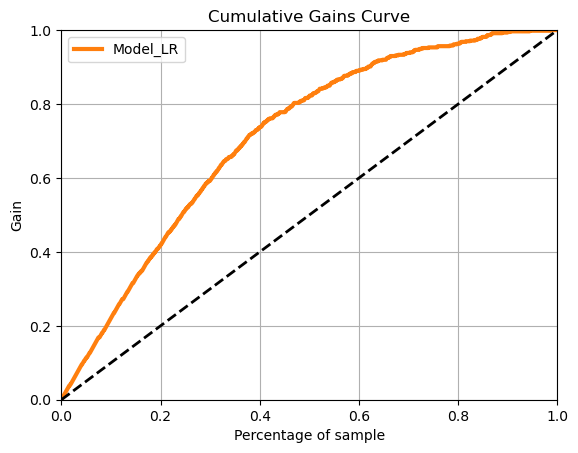

In [40]:
fig, ax = plt.subplots()
skplt.metrics.plot_cumulative_gain(
    val_y,
    model.best_estimator_.predict_proba(val_x),
    ax=ax
)
lines = ax.get_lines()
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

plt.legend(labels=['Model_LR'])
plt.show()

If we use the model with the 20% of the main clients (ordered by scoring) we can obtain approximately 40% of the buyers, which means that the model will work a little more than 2 times better than not using it, as we can see in the lift chart chart.

### Lift Chart

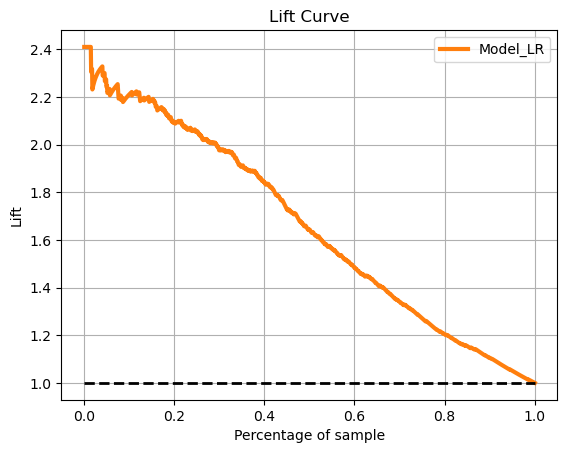

In [44]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(
    val_y,
    model.best_estimator_.predict_proba(val_x),
    ax=ax
) 
lines = ax.get_lines()
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

plt.legend(labels=['Model_LR'])
plt.show()

### ROC Chart

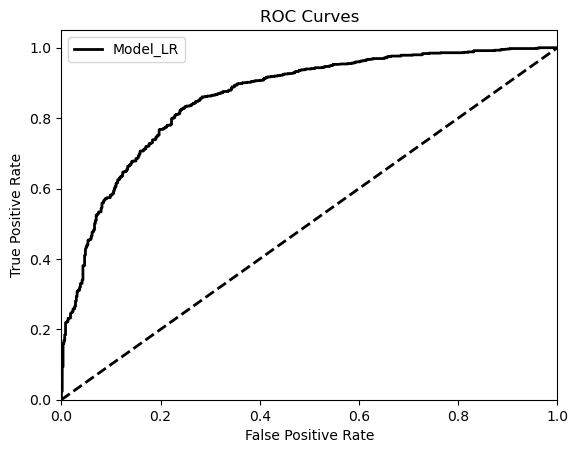

In [45]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, model.best_estimator_.predict_proba(val_x), ax=ax)
lines = ax.get_lines()
for line in lines:
    if 'ROC curve of class 0' in line.get_label():
        line.set_label('Model_LR')
    elif line.get_linestyle() != '--':
        line.set_visible(False)

handles, labels = ax.get_legend_handles_labels()
new_handles = [h for h, l in zip(handles, labels) if l == 'Model_LR']
new_labels = ['Model_LR']

ax.legend(new_handles, new_labels, loc='best')

plt.show()


## Conclusions and next steps

The Logistic Regression model has been trained and evaluated, it returned an AUC (Area Under the Curve) of 0.86, which indicates that the model is effective enough for binary classification and distinguishes between potential customers (leads).

Finally, in the following [notebook](04_lead_scoring_production_code.ipynb), the retraining and model execution pipeline will be prepared to support the software engineering team in its implementation.